# Topics
> ### 1. Concept of Learning 


In [78]:
# importing libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d


#change to 200
pd.options.display.max_rows = 200
#print(pd.options.display.max_rows)


## 1.Concept of Learning 

In [2]:
# we have a dataset on  Height - weight 
data = pd.DataFrame({
        'Height' : [5.6,5.8,5.4,5.9,6.2,6.3] , 
        'Weight' : [60,62,59,67,80,82]
})

unknown_height = 5.3

In [3]:
data

,Height,Weight
0,5.6,60
1,5.8,62
2,5.4,59
3,5.9,67
4,6.2,80
5,6.3,82


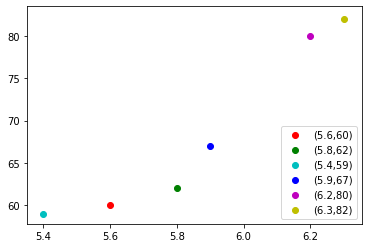

In [4]:
# now we could plot our data 
col = ['r','g','c','b','m','y']
for i in range(len(data['Height'])):
    #print(data['Height'][i],data['Weight'][i])
    plt.scatter(data['Height'][i],data['Weight'][i],label='({0},{1})'.format(data['Height'][i],data['Weight'][i]),color=col[i])
    plt.legend(loc='lower right')

This is our dataset . Height is the input data (Feature) and output is weight(that we measured) . From the dataset we could say that Height and Weight are directly proportional , that means when weight increases , then height also increasing 

> ${Height} \propto {Weight}$

So from this dataset we could say that there some relationship between height and weight . 

First we can try to find out the relationship between height & weight . 

Initially we could write , the relationship as ,
> ${W} = {\beta}{H} \pm {\epsilon}\qquad\qquad$           **Eq1.1**
  
  where ${\beta}$ is **constant** and ${\epsilon}$ is **error** 
  

**Eq1.1** is look like   ${y} = {m}{x} + {c}\quad$ (equation of a line) where m : slope and c : y-intercepte

So comparing both equation we could see that ${\beta}$ is slope and ${\epsilon}$ is y-intercepte 

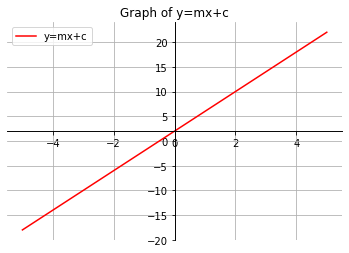

In [5]:
# generate array of 100 numbers from -5 to 5 
x = np.linspace(-5,5,100)
m = 4
c = 2
# now apply equation of line 
y = m*x + c 
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_position('center')
ax.spines['top'].set_position('center')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x,y,'-r',label='y=mx+c')
plt.title('Graph of y=mx+c')
plt.legend(loc='upper left')
plt.grid()
plt.show()

${y}$-intercepte , c (in ${y} = {mx} +{C}$ ) is the value of y when x = 0 

${m}$ is the slope of the line 

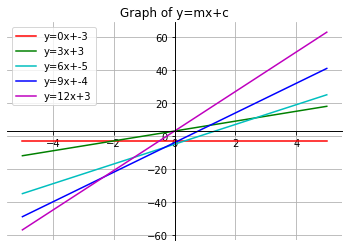

In [115]:
## Now We variy the slope of the line and y-intercept 
## and plot it on the same graph then we can see  effect on the line 
## we give slope values from 0,3,6,9 and 12 
## for y-intercept we take some random value

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colours = ['-r','-g','-c','-b','-m']
slope = [-2,1,0,4,8]
for k,i in enumerate(np.arange(0,15,3)):
    # now apply equation of line 
    m = i 
    c = int(np.random.randint(-5,5,1))
    y = m*x + c
    
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_position('center')
    ax.spines['top'].set_position('center')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.plot(x,y,colours[k],label='y={0}x+{1}'.format(m,c))
    plt.title('Graph of y=mx+c')
    plt.legend(loc='upper left')
    plt.grid()

plt.show()

### FInd values ${\beta}$ and ${\epsilon}$ (intial)
Now we can try to find the values of ${\beta}$ and ${\epsilon}$ .

First consider first 2 datapoints , (5.6,60) and (5.8,62)

we could apply these value **Eq1.1** 

${60} = 5.6{\beta} + {\epsilon}\qquad$ --**Eq1.2**

${62} = 5.8{\beta} + {\epsilon}\qquad$ --**Eq1.3**

We need to solve these Equation 1.2 and 1.3  to get the values of ${\beta}$ and ${\epsilon}$

We could write the above equation in the following form 

>${A}{X} = {B}$ 
>
where ${A} = \begin{bmatrix}
    {5.6} & {1}\\
    {5.8} & {1}
\end{bmatrix}_{Coefficient-Matrix }, {B} =  \begin{bmatrix} 
    {60} \\
    {62}
\end{bmatrix}_{Constant-Matrix} ,  {X} = \begin{bmatrix}
    {\beta} \\
    {\epsilon}
\end{bmatrix}_{Variable-Matrix}$

We could find ${X}$ by using following equation , 

> ${X} = {A}^{-1} {B}$

So we have to first find ${A}^{-1}$

In [7]:
# Coefficient Matrix 
A = np.array([[5.6,1],[5.8,1]])
# Constant Matrix 
B = np.array([60,62])

In [8]:
# we could find the inverse of matrix using np.linalg.inv()
A_inv = np.linalg.inv(A)
A_inv

array([[ -5.,   5.],
       [ 29., -28.]])

In [9]:
# To check our A_inv is correct we need to multiply A with A_inv 
# If we get Identity Matrix then our A_inv is correct 
np.dot(A,A_inv)

array([[ 1.00000000e+00, -3.55271368e-15],
       [ 0.00000000e+00,  1.00000000e+00]])

Now we know ${A}^{-1}$ and ${B}$ So We can use ${X} = {A}^{-1} {B}$

In [10]:
X = np.dot(A_inv,B)


In [11]:
# we could use this np.linalg.solve() solve directly
np.linalg.solve(A,B)

array([10.,  4.])

In [12]:
beta = round(X[0])
e = round(X[1])
print('Beta : ',beta)
print('Epsilon : ',e)

parameters = { 'beta' : beta , 'e' : e }

Beta :  10.0
Epsilon :  4.0


${\beta} = {10.0}$ 

${\epsilon} = {4.0}$

So we got values , now Eq1.1 becomes 

${W} = {10}{H} + {4}\qquad$ --**Eq1.4**

Now we could use this equation to predict values 

In [13]:
h = 5.4 
w_hat = beta*h + e
w = data['Weight'][2]

print("Predicted :{0} \nActual Value (from dataset) : {1}".format(w_hat,w))

Predicted :58.0 
Actual Value (from dataset) : 59


In [14]:
h = 6.3 
w_hat = beta*h + e 
w = data['Weight'][5]

print("Predicted :{0} \nActual Value (from dataset) : {1}".format(w_hat,w))

Predicted :67.0 
Actual Value (from dataset) : 82


So now we can see that simple relation is not perfect , becoz the predicted value is not equal or near to the actual value that we observed in our datases (but some height it may give correct values) 

But this is not learning , becoz we only find ${\beta}$ and ${\epsilon}$ by considering only 2 datapoints . Here we only solved a linear equation , and nothing more . 

when we take height as 5.4 and try to predict weight , we got 58 as weight . 


But the actual weight is 59 . So we could find a loss /cost value by using predicted and actual values . 

### Cost Function / Loss Function

This function will tell us , 'How  good 'is our model is at making prediction for given input

or

It measure the performance of our ML model 

So we consider loss functin called **Root Mean Squared Error (RMSE) ** and it is defined as 

> ${RMSE} = \sqrt {\frac{1}{n} \sum_{i=1}^{n} ({w} - \overline{w})^{2}}$
> where ${W}$ : actual value and $\overline{W}$ : predicted value 

${E}_{error}$ = RMSE

We have to reduce this ${E}_{error}$ by modifying  parameters - ${\beta}$ and ${\epsilon}$ . But by considering 2 datapoints we can not do that , we need to do this operation using a entire training dataset . So when we do future prediction we will get more accurate prediction of weight from our height value . 

So we Use **Gradient Descent** to optimize the parameters -  $\beta$ and $\epsilon$ and to minimize the ${E}_{error}$ (converge ${E}_{error}$ into global-minima point )

## Gradient descent

- Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient <br/>


**Repeat until convergence:** <br/>

1. Given the gradient, calculate the change in the parameters with the learning rate.
2. Re-calculate the new gradient with the new value of the parameter.
3. Repeat step 1.

Repeat Until Convergence $\{$ <br/>
$\quad{\theta}_{j} = {\theta}_{j} - {\eta} \frac {\partial} {\partial{\theta_{j}}}{J}({\theta})$ <br/>
$\quad \}$<br/>

Convergence is a name given to the situation where the loss function does not improve significantly, and we are stuck in a point near to the minima.


![](images/gradient_descent.png)
![](images/fig-2-gradient-descent-steps.gif)

### Update ${\beta}$ and ${\epsilon}$  using gradient
<br/>
<font size=4>
To update ${\beta}$ and ${\epsilon}$ we need to find the following  <br/>

- $ \frac {\partial{E}_{error}}{\partial{\beta}}\qquad$  -- rate of change of Error with respect to $\beta$ <br/>

- $ \frac {\partial{E}_{error}}{\partial{\epsilon}}\qquad$ -- rate of change of Error with respect to $\epsilon$ <br/><br/>

We can update $\beta$ and $\epsilon$ using following equations (update rule) <br/>

${\beta}_{i} = {\beta}_{i-1} -  \eta \frac {\partial{E}_{error}}{\partial{\beta}} $ <br/>

${\epsilon}_{i} = {\epsilon}_{i-1} - \eta \frac {\partial{E}_{error}}{\partial{\epsilon}} $ <br/>

we have to update $\beta$ and $\epsilon$ untill  ${E}_{error}$ reach global minima point 
</font>

<font size=4>
So First we can find $ \frac {\partial{E}_{error}}{\partial{\beta}}$ <br/><br/>


${E}_{error} =  \sqrt { \frac{1}{n} \sum_{i=1}^{n} ({W} - \overline{W})^{2}}$ <br/><br/>


$\frac {\partial{E}_{error}}{\partial{\beta}}$ = 
$\frac {\frac {\partial } {\partial {\beta}} \frac {1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }
{2 \sqrt{ \frac{1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }}$ = 
$\frac { \frac {1}{n} ( {\sum}_{1=1}^{n} \frac {\partial } {\partial {\beta}} ({W} - \overline{W})^{2}) }
{2 \sqrt{ \frac{1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }}\qquad$ ---**Eq1.5**  <br/><br/>


First we need to find $\frac {\partial } {\partial {\beta}} ({W} - \overline{W})^{2}$ <br/>


${W}$ is the Actual Value (const.) <br/>
$\overline{W}$ is the predicted value , $\overline{W}$ = ${\beta}{H} + {\epsilon}$ <br/>
<br/>

$\frac {\partial } {\partial {\beta}} ({W} - \overline{W})^{2})$ $\space$ = 
${2}({W} - \overline{W}) \frac{\partial } {\partial {\beta}}({W} - \overline{W})$ <br/> $\qquad\qquad\quad$ = 
${2}({W} - \overline{W})({0} - \frac {\partial ( { {\beta}{H} + {\epsilon} ) }}{\partial {\beta}})$ <br/> $\qquad\qquad\quad$ = ${2}({W} - \overline{W}) ({0} - {H}) $ <br/> $\qquad\qquad\quad$ = 
$-{2}{H}({W} - \overline{W})$  = ${2}{H}(\overline{W} - {W})$ <br/><br/>

Substitute the value of $\frac {\partial } {\partial {\beta}} (\overline{W} - {W})^{2}$ in **Eq1.5** <br/><br/>

$\frac {\partial{E}_{error}}{\partial{\beta}}$ = $\frac { {2}\frac {1}{n} ( {\sum}_{1=1}^{n} {H}(\overline{W} - {W})} {2 \sqrt{ \frac{1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }}$<br\><br/>$\qquad$ = 
$\frac {  ( {\sum}_{1=1}^{n} {H}(\overline{W} - {W})} {{n} \sqrt{ \frac{1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }}\qquad$
</font>

<font size=4>

Now  we can find $ \frac {\partial{E}_{error}}{\partial{\epsilon}}$ (Rate of change of ${E}_{error}$ with respect to ${\epsilon}$ )<br/><br/>


$\frac {\partial{E}_{error}}{\partial{\epsilon}}$ = 
$\frac {\frac {\partial } {\partial {\epsilon}} \frac {1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }
{2 \sqrt{ \frac{1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }}$ = 
$\frac { \frac {1}{n} ( {\sum}_{1=1}^{n} \frac {\partial } {\partial {\epsilon}} ({W} - \overline{W})^{2}) }
{2 \sqrt{ \frac{1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }}\qquad$ ---**Eq1.6**  <br/><br/>

First we need to find $\frac {\partial } {\partial {\epsilon}} ({W} - \overline{W})^{2}$ <br/>
<br/>
$\frac {\partial } {\partial {\epsilon}} ({W} - \overline{W})^{2})$ $\space$ = 
${2}({W} - \overline{W}) \frac{\partial } {\partial {\epsilon}}({W} - \overline{W})$ <br/> $\qquad\qquad\quad$ = 
${2}({W} - \overline{W})({0} - \frac {\partial ( { {\beta}{H} + {\epsilon} ) }}{\partial {\epsilon}})$ <br/> $\qquad\qquad\quad$ = ${2}({W} - \overline{W}) ({0} - {1}) $ <br/> $\qquad\qquad\quad$ = 
$-{2}({W} - \overline{W})$ <br/> $\qquad\qquad\quad$ = 
${2}(\overline{W} - {W})$ <br/><br/>

$\frac {\partial{E}_{error}}{\partial{\epsilon}}$ = 
$\frac { \frac {2}{n} ( {\sum}_{1=1}^{n} (\overline{W} - {W}) }
{2 \sqrt{ \frac{1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }}$<br/><br/>$\qquad$ = 
$\frac {( {\sum}_{1=1}^{n} (\overline{W} - {W}) }
{{n} \sqrt{ \frac{1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }}$
</font>

In [127]:
#get prediction 
def predict(w,b,e):
    #print(input_data,e,b)
    w_hat = [] #[None for i in range(len(w))]
    if (w.size is not 0)  and (b is not None) and (e is not None):
        for i,j in enumerate(w):
            #print(i,j)
            y = j*b + e 
            w_hat.append(y)
            #print(w_hat[i])
        return(np.array(w_hat))
    else:
        return([-1])

In [117]:
pdata = predict(data['Height'],10,4) 
pdata

array([60., 62., 58., 63., 66., 67.])

In [118]:
def calculate_loss(w_hat,w):
    '''
    Root Mean Squared Error Function 
    w_hat : predicted values 
    w : actual values from dataset 
    '''
    loss = 0 
    n = len(w_hat)
    if w.size == w_hat.size and  w.size is not None:
        for i in range(n):
            ##print('({0} - {1}) ^2  = {2}'.format(w_hat[i],w[i],(w_hat[i] - w[i])** 2))
            loss = loss + (w_hat[i] - w[i]) ** 2
        ##print('loss :',loss)
        loss = np.sqrt(loss/n)
        return(loss)
    else:
        return(-1)

In [119]:
loss = calculate_loss(pdata,data['Weight'].values)
loss

8.54400374531753

<font size=4>

**Gradient Equations** <br/><br/>

$\frac {\partial{E}_{error}}{\partial{\beta}}$ = 
$\frac {  ( {\sum}_{1=1}^{n} {H}(\overline{W} - {W})} {{n} \sqrt{ \frac{1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }}\qquad$
<br/> <br/>
$\frac {\partial{E}_{error}}{\partial{\epsilon}}$ = $\frac {( {\sum}_{1=1}^{n} (\overline{W} - {W}) }
{{n} \sqrt{ \frac{1}{n} ( {\sum}_{1=1}^{n} ({W} - \overline{W})^{2}) }}$

</font>

In [120]:
def calculate_gradient(w_hat,w,h,loss):
    '''
    This function will find the rate of change of error with respect to beta , rate of change of error
    with respect to epsilon using the above equation 
    '''
    n = len(w_hat)
    #first we find out sum(w_hat-w)
    #print((w_hat-w)*h)
    sum_ = np.sum((w_hat-w)*h)
    # rate of change of Error with respect to beta (that we derived )
    beta_gradient = np.sum((w_hat-w)*h)/(n*loss)
    # rate of change of Error with respect to epsilon
    epsilon_gradient = np.sum(w_hat-w) / (n * loss)
    
    return({'beta':beta_gradient , 'e' : epsilon_gradient})
    

In [121]:
calculate_gradient(pdata,data['Weight'].values,data['Height'].values,loss)

{'beta': -4.102292209224377, 'e': -0.6632331674447399}

<font size= 4 >

${\beta}_{i} = {\beta}_{i-1} -  \eta \frac {\partial{E}_{error}}{\partial{\beta}} $ <br/>

${\epsilon}_{i} = {\epsilon}_{i-1} - \eta \frac {\partial{E}_{error}}{\partial{\epsilon}} $ <br/>

${\beta}_{i-1}$ : previous value of ${\beta}$ <br/>
${\epsilon}_{i-1}$ : previous value of ${\epsilon}$ <br/>
${\eta}$ is the learning rate 

</font>

In [122]:
def update_parameters(beta_gradient,epsilon_gradient,learning_rate,param):
    '''
    This function will find the updated values for beta and epsilon using 
    the above equation
    
    beta_gradient : rate of change of error with respect to beta 
    epsilon_gradient : rate of change of error with respect to epsilon 
    '''
    #print(param)
    parameters = param
    parameters['beta'] = parameters['beta'] - (learning_rate * beta_gradient)
    parameters['e'] = parameters['e'] - (learning_rate * epsilon_gradient)
    return(parameters)

In [128]:
def plot_graph(df):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection="3d")

    z_line = df['loss']
    x_line = df['beta']
    y_line = df['e']
    ax.plot3D(x_line, y_line, z_line, 'gray')
    ax.scatter3D(x_line, y_line, z_line, c=z_line, cmap='hsv');
    ax.set_xlabel('beta')
    ax.set_ylabel('epsilon')
    plt.show()

def model_train(iteration,rate):
    '''
    iteration : no of iteration has to perform
    rate : learning rate 
    '''
    # we will store the values like loss , beta and epsilon for plot 
    loss_list = []
    beta_list = []
    e_list = [] #epsilon list 
    
    # initial parameters for beta and epsilon 
    # that we find considering only 2 datapoints 
    parameters = {'beta' : 10 , 'e' : 4}
    #learning rate 
    learning_rate = rate 
    for i in range(iteration):
        #print(' ITERATION{0}'.format(i))
        
        #predict values 
        w_hat = predict(data['Height'].values,parameters['beta'],parameters['e'])
        #print('predicted values :',w_hat)
        
        #find cost 
        loss = calculate_loss(w_hat,data['Weight'].values)
        loss_list.append(loss)
        #print('loss :',loss)
        
        gradient = calculate_gradient(w_hat,w,data['Height'].values,loss)
        #print('gradient : ' , gradient)
        
        parameters = update_parameters(gradient['beta'],gradient['e'],learning_rate,parameters)
        beta_list.append(parameters['beta'])
        e_list.append(parameters['e'])
        
        #print('new parameters :',parameters)
        #print('#######'*10)
        
    #for i in range(iteration):
    #    print('beta :{0} epsilon :{1} loss:{2}\n'.format(beta_list[i],e_list[i],loss_list[i]))
    
    # this will return as Dataframe of calculated loss,beta and epsilon values 
    loss_df = pd.DataFrame({'beta' : beta_list ,'e' : e_list ,'loss' : loss_list})
    return(loss_df)

In [132]:
# learning rate is 0.001
loss_data = model_train(200,.001)
loss_data.head(50)

,beta,e,loss
0,10.013159,4.002263,8.544004
1,10.026349,4.004531,8.488711
2,10.039570,4.006804,8.433679
3,10.052821,4.009083,8.378919
4,10.066102,4.011368,8.324443
5,10.079413,4.013657,8.270261
6,10.092753,4.015952,8.216385
7,10.106123,4.018251,8.162829
8,10.119523,4.020556,8.109605
9,10.132951,4.022866,8.056726


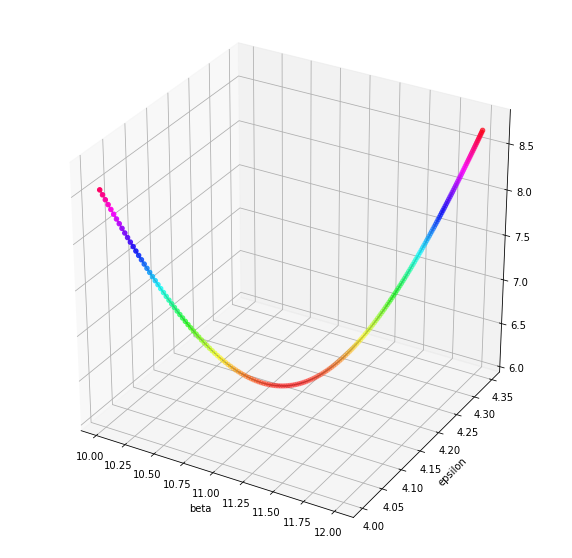

In [130]:
plot_graph(loss_data)

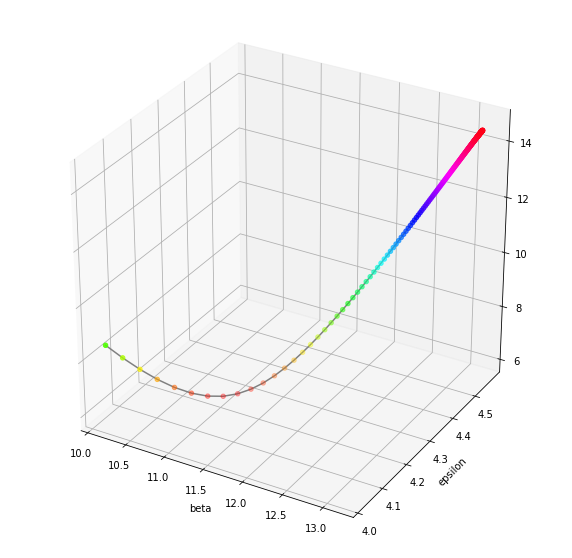

In [131]:
# now we increased the learning rate into 0.01
loss_data = model_train(200,.01)

plot_graph(loss_data)